In [1]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C:/Users/Usuario/Desktop/Mestrado/stock-market-chm/src')

In [2]:
from data_retriever import DataRetriever
from pre_processing import PreProcessing
from scalers.min_max import MinMax
from decomposers.hilbert_huang import EMDDecomposition
import pywt
import copy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Retrieving data from yahoo API
a = DataRetriever()
a.get_yahoo_stock_data()
dataset = a.get_stock_ds()

#Preprocessing yahoo data
pp = PreProcessing(dataset, MinMax)
train, test = pp.pre_process()

[*********************100%***********************]  7 of 7 completed


In [4]:
wd = EMDDecomposition()
ds = train[['Date', 'ITUB3.SA_Close']]

In [5]:
wd.decompose_series(ds=ds, 
                    apply_cols=ds[ds.columns.difference(['Date'])]
                    )

c:\Users\Usuario\Desktop\Mestrado\stock-market-chm\imp-virtual-env\lib\site-packages\emd\support.py:210: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
C:\Users/Usuario/Desktop/Mestrado/stock-market-chm/src\decomposers\hilbert_huang.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[new_col] = imf[:, fr]


In [12]:
ds

,Date,ITUB3.SA_Close,ITUB3.SA_Close_imf_0,ITUB3.SA_Close_imf_1,ITUB3.SA_Close_imf_2,ITUB3.SA_Close_imf_3,ITUB3.SA_Close_imf_4,ITUB3.SA_Close_imf_5,ITUB3.SA_Close_imf_6
0,2010-01-04,0.169217,0.004898,0.038394,-0.000757,-0.030221,0.024878,-0.029991,0.162015
1,2010-01-05,0.170238,0.006870,0.037417,-0.000675,-0.030391,0.025171,-0.030155,0.162002
2,2010-01-06,0.170238,0.008744,0.035518,-0.000588,-0.030560,0.025455,-0.030318,0.161988
3,2010-01-07,0.164114,0.005289,0.032830,-0.000499,-0.030729,0.025730,-0.030481,0.161974
4,2010-01-08,0.156969,0.001141,0.029823,-0.000408,-0.030897,0.025995,-0.030644,0.161960
...,...,...,...,...,...,...,...,...,...
1926,2017-05-29,0.857687,0.000754,0.038192,-0.047147,-0.035014,-0.021697,0.483658,0.438941
1927,2017-05-30,0.856458,-0.002867,0.045184,-0.050480,-0.036031,-0.022718,0.484526,0.438845
1928,2017-05-31,0.858096,0.002919,0.043851,-0.052119,-0.036941,-0.023747,0.485384,0.438749
1929,2017-06-01,0.846003,-0.003692,0.039554,-0.052223,-0.037741,-0.024781,0.486233,0.438653


In [13]:
sum(ds[1000:]['ITUB3.SA_Close_wave_6'])

KeyError: 'ITUB3.SA_Close_wave_6'

In [35]:
wd = WaveletDecomposition()

train = train.append(test[:100]).reset_index(drop=True)

ds = train[['Date', 'ITUB3.SA_Close']]

In [36]:
wd.decompose_series(ds=ds, 
                    apply_cols=ds[ds.columns.difference(['Date'])]
                    )

c:\Users\Usuario\Desktop\Mestrado\stock-market-chm\src\decomposers\wavelet_transform.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[new_col] = rec[:len(rec)-1]


In [37]:
sum(ds[1000:]['ITUB3.SA_Close_wave_6'])

-0.045762023053010685

In [42]:

sub_waves = list() 
for i in wd.dict_waves.keys():
    sub_waves = sub_waves + wd.dict_waves[i]

In [48]:
list(filter(lambda x: x not in ['ITUB3.SA_Open_wave_0','ITUB3.SA_Close_wave_0'], sub_waves))

['ITUB3.SA_Close_wave_1',
 'ITUB3.SA_Close_wave_2',
 'ITUB3.SA_Close_wave_3',
 'ITUB3.SA_Close_wave_4',
 'ITUB3.SA_Close_wave_5',
 'ITUB3.SA_Close_wave_6',
 'ITUB3.SA_Close_wave_7',
 'ITUB3.SA_Close_wave_8',
 'ITUB3.SA_Close_wave_9',
 'ITUB3.SA_Close_wave_10',
 'ITUB3.SA_Close_wave_11',
 'ITUB3.SA_Open_wave_1',
 'ITUB3.SA_Open_wave_2',
 'ITUB3.SA_Open_wave_3',
 'ITUB3.SA_Open_wave_4',
 'ITUB3.SA_Open_wave_5',
 'ITUB3.SA_Open_wave_6',
 'ITUB3.SA_Open_wave_7',
 'ITUB3.SA_Open_wave_8']

In [43]:
sub_waves

['ITUB3.SA_Close_wave_0',
 'ITUB3.SA_Close_wave_1',
 'ITUB3.SA_Close_wave_2',
 'ITUB3.SA_Close_wave_3',
 'ITUB3.SA_Close_wave_4',
 'ITUB3.SA_Close_wave_5',
 'ITUB3.SA_Close_wave_6',
 'ITUB3.SA_Close_wave_7',
 'ITUB3.SA_Close_wave_8',
 'ITUB3.SA_Close_wave_9',
 'ITUB3.SA_Close_wave_10',
 'ITUB3.SA_Close_wave_11',
 'ITUB3.SA_Open_wave_0',
 'ITUB3.SA_Open_wave_1',
 'ITUB3.SA_Open_wave_2',
 'ITUB3.SA_Open_wave_3',
 'ITUB3.SA_Open_wave_4',
 'ITUB3.SA_Open_wave_5',
 'ITUB3.SA_Open_wave_6',
 'ITUB3.SA_Open_wave_7',
 'ITUB3.SA_Open_wave_8']

In [14]:
max_wave = 0
for i in wd.dict_waves.keys():    
    if(len(wd.dict_waves[i]) > max_wave):
        max_wave = len(wd.dict_waves[i])

for j in range(max_wave):
    cols = list()
    for i in wd.dict_waves.keys():
        max_len = len(wd.dict_waves[i])
        if j >= max_len:
            cols.append(wd.dict_waves[i][max_len-1])
        else:
            cols.append(wd.dict_waves[i][j])

    print(cols)

['ITUB3.SA_Close_imf_0']
['ITUB3.SA_Close_imf_1']
['ITUB3.SA_Close_imf_2']
['ITUB3.SA_Close_imf_3']
['ITUB3.SA_Close_imf_4']
['ITUB3.SA_Close_imf_5']
['ITUB3.SA_Close_imf_6']


In [22]:
ds

,Date,ITUB3.SA_Close,ITUB3.SA_Open,ITUB3.SA_Close_wave_0,ITUB3.SA_Close_wave_1,ITUB3.SA_Close_wave_2,ITUB3.SA_Close_wave_3,ITUB3.SA_Close_wave_4,ITUB3.SA_Close_wave_5,ITUB3.SA_Close_wave_6,...,ITUB3.SA_Close_wave_8,ITUB3.SA_Open_wave_0,ITUB3.SA_Open_wave_1,ITUB3.SA_Open_wave_2,ITUB3.SA_Open_wave_3,ITUB3.SA_Open_wave_4,ITUB3.SA_Open_wave_5,ITUB3.SA_Open_wave_6,ITUB3.SA_Open_wave_7,ITUB3.SA_Open_wave_8
0,2010-01-04,0.169218,0.140564,0.147959,-0.004412,0.009609,-0.001955,0.008040,0.007714,0.003425,...,0.000177,0.138278,-0.004657,0.008979,-0.001160,0.008219,0.005609,0.000197,-0.014228,-0.000674
1,2010-01-05,0.170238,0.161342,0.147780,-0.004672,0.009484,-0.002932,0.007960,0.007597,0.003923,...,-0.001186,0.138104,-0.004918,0.008831,-0.002099,0.008218,0.006193,0.004380,0.001354,0.001279
2,2010-01-06,0.170238,0.163399,0.147599,-0.004933,0.009338,-0.003908,0.007610,0.007705,0.003625,...,0.001202,0.137928,-0.005179,0.008661,-0.003034,0.007982,0.007001,0.005606,0.005516,-0.001082
3,2010-01-07,0.164114,0.158668,0.147417,-0.005191,0.009169,-0.004876,0.006962,0.008090,0.002831,...,0.001264,0.137749,-0.005438,0.008469,-0.003959,0.007488,0.008064,0.003359,0.003879,-0.000942
4,2010-01-08,0.156969,0.154964,0.147234,-0.005455,0.008999,-0.005925,0.006281,0.007976,0.000759,...,-0.000730,0.137571,-0.005702,0.008275,-0.004965,0.006962,0.008952,0.000572,0.002874,0.000426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,2017-05-29,0.857687,0.856172,0.871120,-0.016337,0.005629,0.004287,-0.013902,-0.004732,0.022408,...,-0.000548,0.870810,-0.013799,0.006330,0.004519,-0.013951,-0.010774,0.016570,-0.013204,0.009672
1927,2017-05-30,0.856457,0.849152,0.870588,-0.016544,0.003049,0.005373,-0.017395,-0.002250,0.018496,...,-0.001297,0.870311,-0.013950,0.003732,0.005533,-0.017396,-0.008028,0.014517,0.000429,-0.005995
1928,2017-05-31,0.858097,0.859476,0.870122,-0.016733,0.000666,0.006272,-0.019934,-0.000136,0.017208,...,0.002437,0.869878,-0.014088,0.001333,0.006367,-0.019889,-0.005226,0.015825,0.002959,0.002317
1929,2017-06-01,0.846004,0.857206,0.869764,-0.016895,-0.001363,0.006858,-0.020618,0.000832,0.010064,...,-0.004189,0.869552,-0.014205,-0.000712,0.006901,-0.020544,-0.002849,0.013229,0.002042,0.003791


In [21]:
for i in range(1):
    print(i)

0


In [20]:
list(reversed(range(6)))

[5, 4, 3, 2, 1, 0]

----------------------------
ITUB3.SA_Close iteration:  0


C:\Users\Usuario\AppData\Local\Temp/ipykernel_20196/3432798484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[i + '_sum'] = 0
C:\Users\Usuario\AppData\Local\Temp/ipykernel_20196/3432798484.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[i + '_sum'] = ds[i + '_sum'] + ds[col]


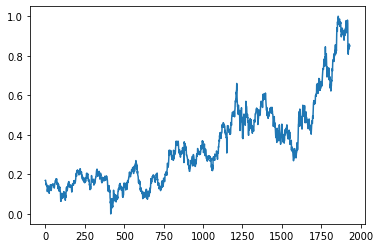

{'ITUB3.SA_Close': ['ITUB3.SA_Close_imf_0', 'ITUB3.SA_Close_imf_1', 'ITUB3.SA_Close_imf_2', 'ITUB3.SA_Close_imf_3', 'ITUB3.SA_Close_imf_4', 'ITUB3.SA_Close_imf_5']}
----------------------------
ITUB3.SA_Close iteration:  1


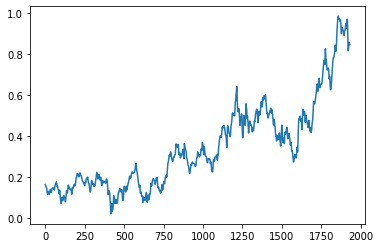

{'ITUB3.SA_Close': ['ITUB3.SA_Close_imf_0', 'ITUB3.SA_Close_imf_1', 'ITUB3.SA_Close_imf_2', 'ITUB3.SA_Close_imf_3', 'ITUB3.SA_Close_imf_4']}
----------------------------
ITUB3.SA_Close iteration:  2


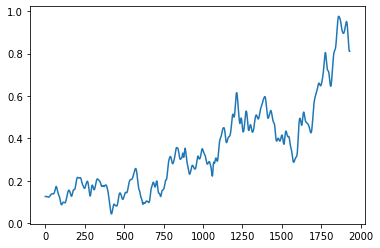

{'ITUB3.SA_Close': ['ITUB3.SA_Close_imf_0', 'ITUB3.SA_Close_imf_1', 'ITUB3.SA_Close_imf_2', 'ITUB3.SA_Close_imf_3']}
----------------------------
ITUB3.SA_Close iteration:  3


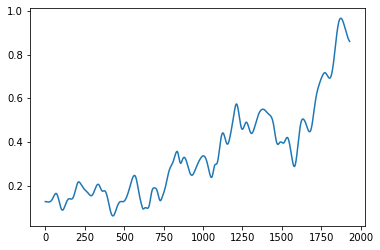

{'ITUB3.SA_Close': ['ITUB3.SA_Close_imf_0', 'ITUB3.SA_Close_imf_1', 'ITUB3.SA_Close_imf_2']}
----------------------------
ITUB3.SA_Close iteration:  4


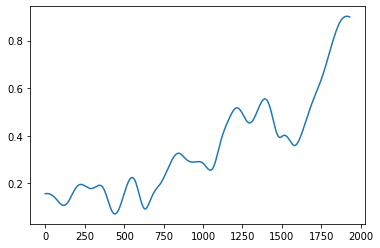

{'ITUB3.SA_Close': ['ITUB3.SA_Close_imf_0', 'ITUB3.SA_Close_imf_1']}
----------------------------
ITUB3.SA_Close iteration:  5


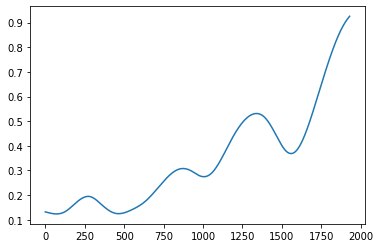

{'ITUB3.SA_Close': ['ITUB3.SA_Close_imf_0']}
----------------------------
ITUB3.SA_Close iteration:  6


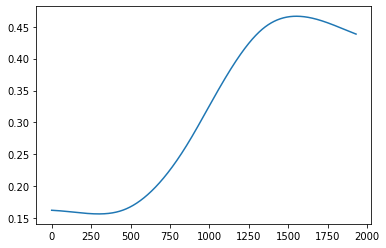

{'ITUB3.SA_Close': ['ITUB3.SA_Close_imf_0']}


In [6]:
max_wave = 0
for i in wd.dict_waves.keys():    
    if(len(wd.dict_waves[i]) > max_wave):
        max_wave = len(wd.dict_waves[i])

for j in range(max_wave):
    

    for i in wd.dict_waves.keys(): 
        ds[i + '_sum'] = 0   
        for col in wd.dict_waves[i]:
            ds[i + '_sum'] = ds[i + '_sum'] + ds[col]
    
        print('----------------------------')
        print(i, 'iteration: ', j )
        
        plt.plot(ds[i + '_sum'])
        plt.show()

    for k in wd.dict_waves.keys():
        if len(wd.dict_waves[k]) > 1:
            wd.dict_waves[k].pop()

    print(wd.dict_waves)
    

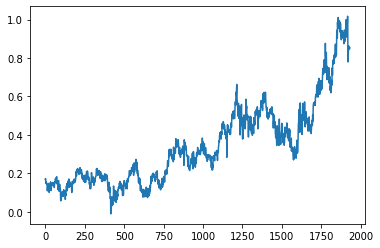

In [21]:
wd.dict_waves

{'ITUB3.SA_Close': ['ITUB3.SA_Close_wave_0',
  'ITUB3.SA_Close_wave_1',
  'ITUB3.SA_Close_wave_2',
  'ITUB3.SA_Close_wave_3',
  'ITUB3.SA_Close_wave_4',
  'ITUB3.SA_Close_wave_5',
  'ITUB3.SA_Close_wave_6',
  'ITUB3.SA_Close_wave_7'],
 'ITUB3.SA_Open': ['ITUB3.SA_Open_wave_0',
  'ITUB3.SA_Open_wave_1',
  'ITUB3.SA_Open_wave_2',
  'ITUB3.SA_Open_wave_3',
  'ITUB3.SA_Open_wave_4',
  'ITUB3.SA_Open_wave_5',
  'ITUB3.SA_Open_wave_6',
  'ITUB3.SA_Open_wave_7']}

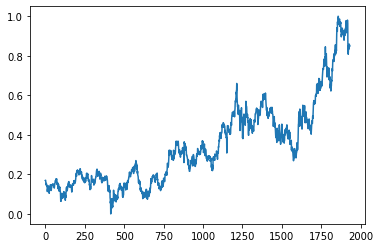

In [9]:
plt.plot(train['ITUB3.SA_Close'])
plt.show()

In [10]:
arr = [1,2,3,4,5,6,7]

In [12]:
arr[:len(arr)-1]

[1, 2, 3, 4, 5, 6]

In [19]:
coeffs

[array([ 2.61093361,  2.62816852,  2.63079784,  2.59642566,  2.71399601,
         2.35893594,  2.65358925,  2.07092079,  3.80355167,  5.29451805,
         8.07197661,  6.25661931, 12.22325594, 13.56299534]),
 array([-0.00154688, -0.00159312,  0.11544096, -0.12597399, -0.70202726,
        -0.59048642,  0.11174387,  0.7669019 , -0.02065484,  0.22585991,
        -0.2853778 , -0.0751196 ,  0.38151105, -0.38561189]),
 array([-1.53866624e-03,  7.38482832e-04,  6.22754316e-02, -3.36612346e-02,
         3.92134794e-01,  1.83462137e-01, -2.69853387e-01, -2.39727352e-02,
        -8.47995306e-02,  3.72127813e-01,  2.35512716e-01,  1.13437907e-01,
         1.55738009e-01,  3.17279061e-01, -2.84229326e-01,  5.68100532e-01,
         5.05734428e-01,  6.24586614e-01, -3.06683473e-01,  1.73638208e-01,
        -8.85673663e-01, -3.71505068e-01]),
 array([-1.00291589e-03, -4.10398186e-04,  5.74843352e-02, -2.96777803e-02,
        -2.31944145e-01, -2.99140877e-02, -8.62425364e-02, -8.32868731e-02,
        

In [26]:
[1,1,1,1,1,1] + [1,1,1,1,1,1] 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [59]:
np.matrix(freqs[0:2]).sum(axis=0).tolist()[0]

[0.14354786518729942,
 0.1431079413027757,
 0.14266706638414212,
 0.1422257213107054,
 0.1417784080056102,
 0.14132671061684277,
 0.1409090074070892,
 0.1405286308152509,
 0.14016876684613405,
 0.13984043241948899,
 0.13952034815216652,
 0.1392078341834549,
 0.1389245941182729,
 0.1386664456254228,
 0.1384078816397513,
 0.1381499530571842,
 0.1379027336810139,
 0.1376605066585557,
 0.13744488644085545,
 0.13725771374079426,
 0.13708397868933075,
 0.13692899108426604,
 0.13676447807757228,
 0.13658642872654142,
 0.13641234824122025,
 0.13623405794675156,
 0.13606494397796773,
 0.13590644945075386,
 0.13574470113139586,
 0.13558247582653982,
 0.13544644456591745,
 0.1353371080177317,
 0.13524348787351043,
 0.1351723549039066,
 0.13510466219798903,
 0.1350392518532069,
 0.1349912982110251,
 0.13495666711211654,
 0.13490947261680508,
 0.13484889911127898,
 0.13478424635660283,
 0.13470854914712643,
 0.13464049381163598,
 0.1345806045294604,
 0.13451335928995276,
 0.13444238486086743,
 0.13

In [38]:
0.14795947 + -0.0044116

0.14354787000000002

In [30]:
freqs

[array([0.14795947, 0.14778043, 0.14759962, ..., 0.86976312, 0.86941731,
        0.86908152]),
 array([-0.0044116 , -0.00467249, -0.00493255, ..., -0.01689526,
        -0.01704631, -0.01718672]),
 array([ 0.00960919,  0.00948371,  0.00933767, ..., -0.00136284,
        -0.0032544 , -0.00502373]),
 array([-0.00195461, -0.00293164, -0.00390784, ...,  0.00685797,
         0.00741538,  0.00795359]),
 array([ 0.00803954,  0.00795963,  0.00760965, ..., -0.02061835,
        -0.02111871, -0.02153697]),
 array([0.0077144 , 0.00759707, 0.00770542, ..., 0.00083195, 0.00315246,
        0.00697459]),
 array([0.00342486, 0.00392337, 0.00362489, ..., 0.01006366, 0.00620119,
        0.00819213]),
 array([-0.00134004,  0.00228458,  0.00199912, ...,  0.00155209,
         0.00264559, -0.0004352 ]),
 array([ 0.00017652, -0.00118627,  0.00120242, ..., -0.00419   ,
         0.0026896 ,  0.00208289])]

In [40]:
freqs[0:1]

[array([0.14795947, 0.14778043, 0.14759962, ..., 0.86976312, 0.86941731,
        0.86908152])]

In [46]:
list(range(len(freqs)))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [49]:
freqs[0:1434]dddd

[array([0.14795947, 0.14778043, 0.14759962, ..., 0.86976312, 0.86941731,
        0.86908152]),
 array([-0.0044116 , -0.00467249, -0.00493255, ..., -0.01689526,
        -0.01704631, -0.01718672]),
 array([ 0.00960919,  0.00948371,  0.00933767, ..., -0.00136284,
        -0.0032544 , -0.00502373]),
 array([-0.00195461, -0.00293164, -0.00390784, ...,  0.00685797,
         0.00741538,  0.00795359]),
 array([ 0.00803954,  0.00795963,  0.00760965, ..., -0.02061835,
        -0.02111871, -0.02153697]),
 array([0.0077144 , 0.00759707, 0.00770542, ..., 0.00083195, 0.00315246,
        0.00697459]),
 array([0.00342486, 0.00392337, 0.00362489, ..., 0.01006366, 0.00620119,
        0.00819213]),
 array([-0.00134004,  0.00228458,  0.00199912, ...,  0.00155209,
         0.00264559, -0.0004352 ]),
 array([ 0.00017652, -0.00118627,  0.00120242, ..., -0.00419   ,
         0.0026896 ,  0.00208289])]

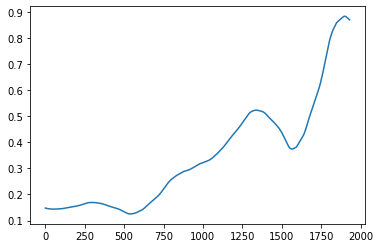

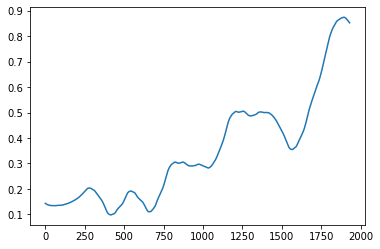

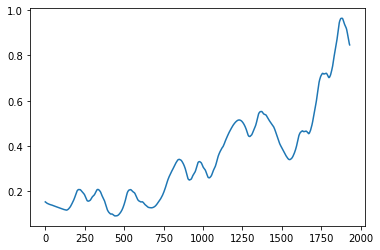

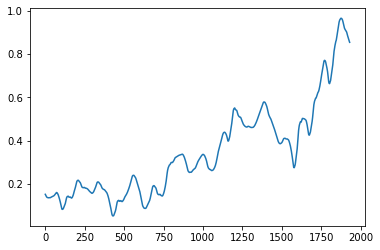

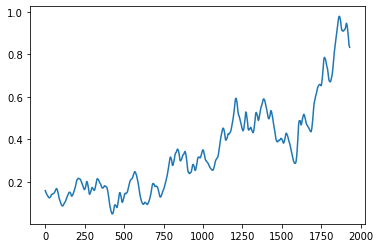

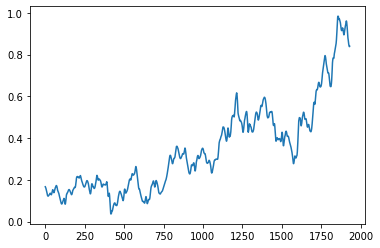

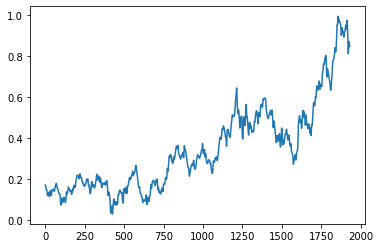

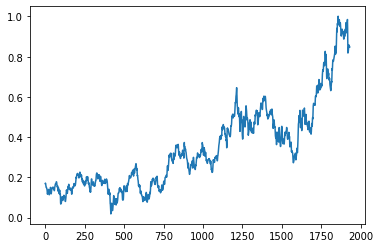

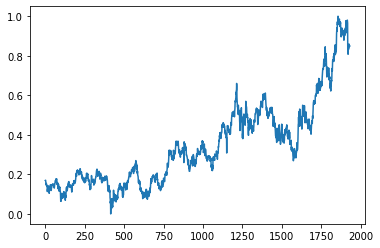

In [60]:
for i in range(len(freqs)):
    plt.plot(np.matrix(freqs[0:i+1]).sum(axis=0).tolist()[0])
    plt.show()

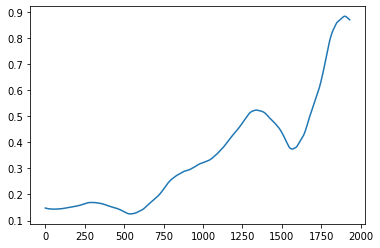

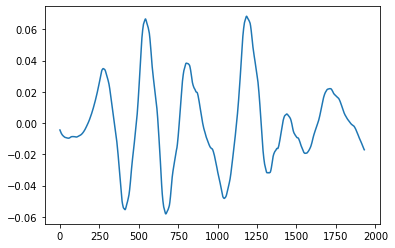

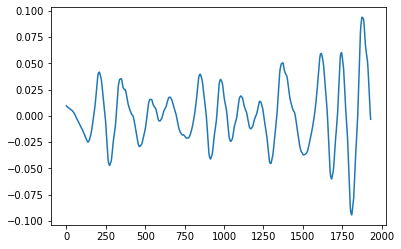

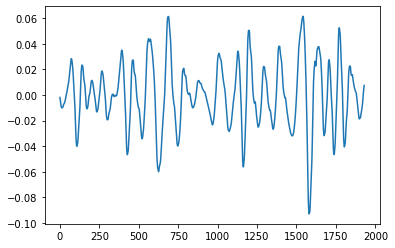

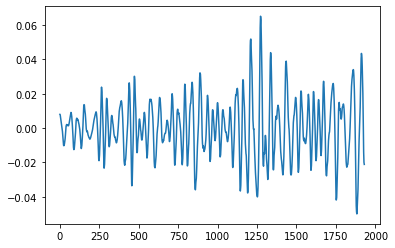

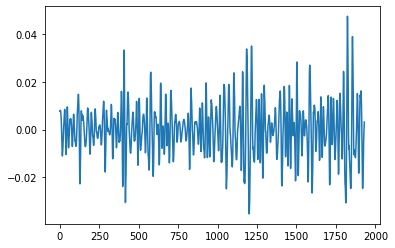

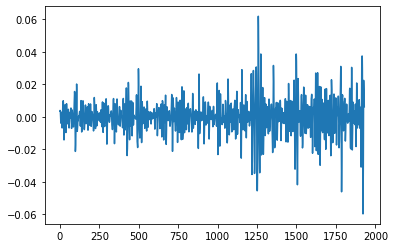

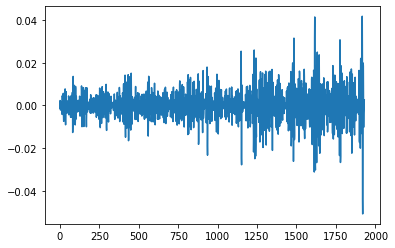

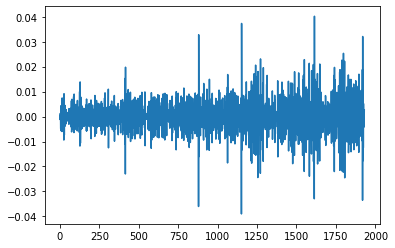

In [56]:
wavelet = pywt.Wavelet('db4')
#Finding CA and CDs of wave
coeffs = pywt.wavedec(train['ITUB3.SA_Close'], wavelet)
freqs = list()
# For each array of coefficients found
for i in range(len(coeffs)):

    coeffs2 = copy.deepcopy(coeffs)
    # For each array of coefficients found 
    for j in range(len(coeffs)):
        if i != j:
            # For each element of array of coefficients found
            for k in range(len(coeffs[j])):
                coeffs2[j][k] = 0

    #Adding decomposed wave to the dataset
    rec = pywt.waverec(coeffs2, wavelet)
    freqs.append(rec)
    plt.plot(rec[:len(rec)-1])
    plt.show()

In [62]:
train['ITUB3.SA_Close']

0       0.169218
1       0.170238
2       0.170238
3       0.164115
4       0.156970
          ...   
1926    0.857686
1927    0.856457
1928    0.858096
1929    0.846002
1930    0.850102
Name: ITUB3.SA_Close, Length: 1931, dtype: float64

In [61]:
np.matrix(freqs[0:9]).sum(axis=0).tolist()[0]

[0.1692177318851415,
 0.17023839959071807,
 0.17023839959071804,
 0.16411468329908271,
 0.15696971941822294,
 0.14778349261166626,
 0.1539073538742136,
 0.15370337980110146,
 0.14267950171467975,
 0.14574201222960118,
 0.14574201222960115,
 0.14370053184753617,
 0.1273694861310315,
 0.11308006576750393,
 0.1238996073535335,
 0.12389960735353349,
 0.12226625633133281,
 0.12022477594926766,
 0.12532815071987838,
 0.12941089402764058,
 0.1357825830641647,
 0.14190923501676705,
 0.13537405503429262,
 0.13067739615715457,
 0.11638141585986128,
 0.1041280757119286,
 0.12352924291623202,
 0.1276136533894815,
 0.12148747259234308,
 0.13374016037117203,
 0.133740160371172,
 0.13374016037117206,
 0.14742287746819321,
 0.14803574199845743,
 0.1468107377924888,
 0.13394181490969304,
 0.11948883111475903,
 0.11845591336712287,
 0.11948883111475911,
 0.13208390394488337,
 0.13233162299067616,
 0.13728868586840234,
 0.14369248596192305,
 0.1447251862531914,
 0.14885598741826453,
 0.14472518625319145,

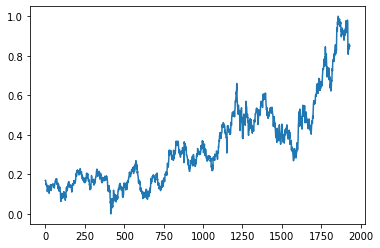

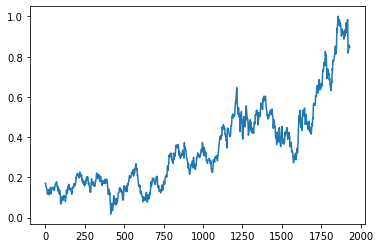

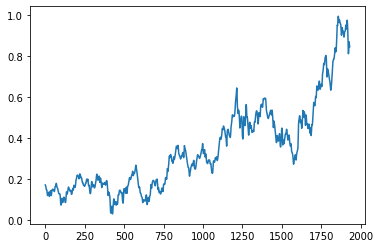

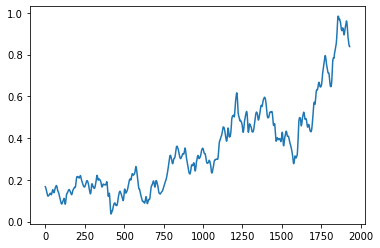

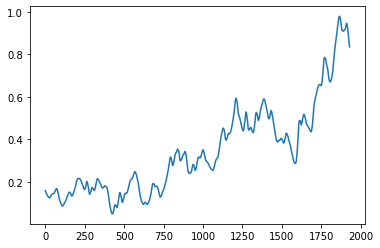

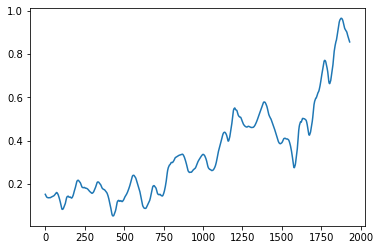

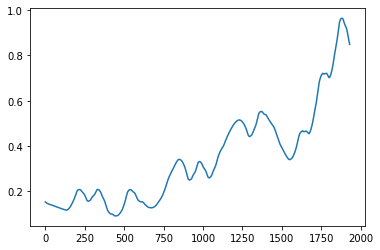

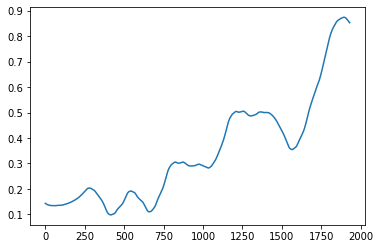

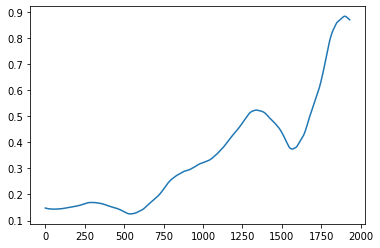

In [31]:
wavelet = pywt.Wavelet('db4')
#Finding CA and CDs of wave
coeffs = pywt.wavedec(train['ITUB3.SA_Close'], wavelet)

# For each array of coefficients found
for i in reversed(range(len(coeffs))):

    coeffs2 = copy.deepcopy(coeffs)
    # For each array of coefficients found 
    for j in reversed(range(len(coeffs))):
        
        if i < j:
            # For each element of array of coefficients found
            for k in range(len(coeffs[j])):
                coeffs2[j][k] = 0

    #Adding decomposed wave to the dataset
    rec = pywt.waverec(coeffs2, wavelet)
    
    plt.plot(rec[:len(rec)-1])
    plt.show()